In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from copy import deepcopy

Basic operations on images

In [2]:
img=cv2.imread("im0.png",1)

In [3]:
img[0][0]


array([ 50,  76, 123], dtype=uint8)

In [4]:
img[1,2]==93

array([False, False, False])

In [2]:
def wind(image):  
    cv2.namedWindow("image",cv2.WINDOW_NORMAL)
    cv2.imshow("image", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [6]:
wind(img)

In [7]:
imgCol=cv2.imread("im0.png",1)

In [8]:
wind(imgCol)

In [9]:
imgCol1=deepcopy(imgCol)
circle=cv2.circle(imgCol1,(780,1280),350,(125,50,39),20)
wind(circle)

In [10]:
imgN1=cv2.imread("double.png",1)

In [11]:
wind(imgN1)

In [ ]:
imgN=deepcopy(imgN1)
def click2circle(event,x,y,flags,param):
    if event==cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(imgN,(x,y),50,(255,0,0),4)

cv2.namedWindow("differences",cv2.WINDOW_NORMAL)
cv2.setMouseCallback("differences", click2circle)

while True:
    cv2.imshow("differences",imgN)
    a=cv2.waitKey(1)
#    print("2 seconds")
    if a==27:
        break
cv2.destroyAllWindows()

2.2. Splitting channels, map algebra

In [12]:
wind(imgCol)

In [13]:
b,g,r=cv2.split(imgCol)

In [14]:
a=1

In [15]:
wind(r)

In [16]:
wind(r-b)

In [17]:
imgcol2=cv2.merge((b,g,r))

In [18]:
wind(imgcol2)

2.3. Resizing, cropping and exporting

In [19]:
imgres=cv2.resize(imgCol,dsize=None,fx=0.2,fy=0.2,interpolation=cv2.INTER_CUBIC)

In [20]:
cv2.imshow("window",imgres)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [21]:
cropped=imgres[210:368,380:570]

In [22]:
wind(cropped)

In [23]:
cv2.imwrite("wheel.png",cropped)

True

## Chapter 3: Geometric operations on images 

In [24]:
crops=cv2.imread("crops.png",0)

In [25]:
wind(crops)

In [26]:
sobelx=cv2.Sobel(crops,cv2.CV_8U,1,0,ksize=3)

In [27]:
wind(sobelx)

In [28]:
laplacian=cv2.Laplacian(crops,cv2.CV_8U)
wind(laplacian)

3.2. Edge and feature detection

In [29]:
edges=cv2.Canny(crops,100,200)
wind(edges)

In [19]:
bbal=cv2.imread("basketball.jpg",1)
wind(bbal)

In [20]:
edges=cv2.Canny(bbal,150,400)
wind(edges)

In [15]:
lines=cv2.HoughLines(edges,1,np.pi/180,200)

In [16]:
lines

array([[[  1.       ,   1.5707964]],

       [[340.       ,   1.5707964]],

       [[282.       ,   0.       ]],

       [[559.       ,   0.       ]],

       [[279.       ,   0.       ]],

       [[127.       ,   1.5707964]],

       [[212.       ,   1.5707964]],

       [[130.       ,   1.5707964]],

       [[215.       ,   1.5707964]],

       [[224.       ,   1.5707964]],

       [[118.       ,   1.5707964]],

       [[  2.       ,   0.       ]],

       [[114.       ,   1.5707964]],

       [[228.       ,   1.5707964]]], dtype=float32)

In [22]:
for iterator in lines:
    rho=iterator[0][0]
    theta=iterator[0][1]
    a=np.cos(theta)
    b=np.sin(theta)
    x0=a*rho
    y0=b*rho
    x1=int(x0+1000*(-b))
    y1=int(y0+1000*(a))
    x2=int(x0-1000*(-b))
    y2=int(y0-1000*(a))
    cv2.line(bbal,(x1,y1),(x2,y2),(0,0,255),2)

In [23]:
wind(bbal)

3.3. A simple geocomputation application

In [24]:
imgN1=cv2.imread("double.png",1)

In [25]:
wind(imgN1)

In [26]:
diffs=np.array([[538,109],[1203,739],[758,137],[1240,467]])

In [27]:
def euclid(x1,x2,y1,y2):
    return int(np.sqrt((x1-x2)**2+(y1-y2)**2))

In [ ]:
imgN=deepcopy(imgN1)
def click2circle(event,x,y,flags,param):
    if event==cv2.EVENT_LBUTTONDBLCLK:
        for diff in diffs:
            if euclid(x,diff[0],y,diff[1])<15:
                cv2.circle(imgN,(x,y),50,(255,0,0),4)

cv2.namedWindow("differences",cv2.WINDOW_NORMAL)
cv2.setMouseCallback("differences", click2circle)

while True:
    cv2.imshow("differences",imgN)
    a=cv2.waitKey(1)
#    print("2 seconds")
    if a==27:
        break
cv2.destroyAllWindows()

# Chapter 4: Radiometric operations on images 

4.1. Image colorspace and thresholding

In [29]:
hsv=cv2.cvtColor(imgN1,cv2.COLOR_BGR2HSV)

In [30]:
wind(hsv)

In [31]:
gray=cv2.cvtColor(imgN1,cv2.COLOR_BGR2GRAY)

In [32]:
wind(gray)

In [33]:
r,t=cv2.threshold(gray,100,255,cv2.THRESH_BINARY)

In [34]:
r

100.0

In [35]:
t

array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [36]:
wind(t)

4.2. Image histogram

In [37]:
lena=cv2.imread("lena.jpg",0)

In [38]:
wind(lena)

In [39]:
hist=cv2.calcHist([lena],[0],None,[256],[0,256])

In [40]:
xaxis=np.arange(256).reshape(256,1)

In [41]:
histogram=np.hstack((xaxis,hist)).astype(int)

<function matplotlib.pyplot.show(close=None, block=None)>

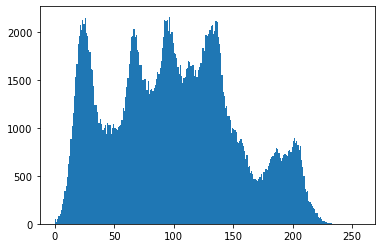

In [42]:
plt.hist(lena.flatten(),256,[0,256])
plt.show

In [43]:
equ=cv2.equalizeHist(lena)

In [44]:
wind(equ)

In [45]:
res=np.hstack((lena,equ))

In [46]:
wind(res)

4.3. Convolution based operations

In [47]:
blur=cv2.blur(lena,(7,7))
wind(blur)

In [48]:
blurG=cv2.GaussianBlur(lena,(11,11),0)
wind(blurG)

In [49]:
res=np.hstack((lena,blurG))

In [50]:
wind(res)

4.4. k-means classification

In [51]:
img=cv2.imread("im0.png",1)
wind(img)

In [52]:
imgCL=np.float32(img.reshape((-1,3)))

In [53]:
imgCL=np.float32(img.reshape((-1,3)))
criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,15,1.0)
K=4
ret,lab,center=cv2.kmeans(imgCL,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
center=np.uint8(center)
res=center[lab.flatten()]
res2=res.reshape((img.shape))
wind(res2)